In [1]:
from models import *

In [2]:
df = pd.read_csv('data/original/dataset.csv')
df.head()

/var/folders/5w/bchvy66s6vbgncfkws1skvf40000gp/T/ipykernel_5435/1010640072.py:1: DtypeWarning: Columns (10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/original/dataset.csv')


,SessionID,Start,End,kWh,Revenue,InternalNum,City,Station,PortNum,PortType,...,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type,ChargingTime
0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,28410100,Київ,209,3,Type 2 Plug,...,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,25.80
1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,25840200,Київ,111,1,CHAdeMO,...,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,1.70
2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,40112300,Стрый,147,1,Type 2,...,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,SLOW,55.02
3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,25840200,Київ,111,1,CHAdeMO,...,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,24.78
4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,28410100,Київ,209,3,Type 2 Plug,...,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,23.03


In [3]:
df['Client'].unique().shape

(30300,)

In [4]:
df['Fishka'].shape

(372187,)

In [5]:
df['Start'] = pd.to_datetime(df['Start'], format='%Y-%m-%d %H:%M:%S')
df['End'] = pd.to_datetime(df['End'], format='%Y-%m-%d %H:%M:%S')
df['Start'] = pd.to_datetime(df['Start'], format='%Y-%m-%d %H:%M:%S')
df2021 = df[(df['Start'] >= '2021-01-01 01:01:01') & (df['Start'] <= '2022-01-01 01:01:01')]
df2022 = df[(df['Start'] >= '2022-01-01 01:01:01') & (df['Start'] <= '2023-01-01 01:01:01')]
df2023 = df[(df['Start'] >= '2023-01-01 01:01:01') & (df['Start'] <= '2024-01-01 01:01:01')]
df2024 = df[(df['Start'] >= '2024-01-01 01:01:01') & (df['Start'] <= '2025-01-01 01:01:01')]
print(f" 2021: {df2021.shape[0]} \n 2022: {df2022.shape[0]} \n 2023: {df2023.shape[0]} \n 2024: {df2024.shape[0]}")

 2021: 15986 
 2022: 20404 
 2023: 148449 
 2024: 187347


In [6]:
train, test = train_test(df)
train, valid = train_test(train)

In [8]:
train['Fishka'].unique

<bound method Series.unique of 343755    True
319149     NaN
338634     NaN
175914     NaN
95606     True
          ... 
259178     NaN
365838     NaN
131932    True
146867    True
121958    True
Name: Fishka, Length: 297749, dtype: object>

In [9]:
train.dtypes

SessionID                       int64
Start                  datetime64[ns]
End                    datetime64[ns]
Revenue                       float64
InternalNum                     int64
City                           object
Station                         int64
PortNum                         int64
PortType                       object
Adapter                        object
Client                         object
Tariff                        float64
MaxPower                       object
Fishka                         object
Successful                     object
DisconnectionReason            object
Latitude                      float64
Longitude                     float64
Type                           object
ChargingTime                  float64
kWh                           float64
dtype: object

In [10]:
# features = ['Latitude', 'Longitude', 'Fishka', 'Client', 'PortType', 'PortNum', 'Adapter', 'City', 'Station']
# categorical = ['Client', 'PortType', 'PortNum', 'Adapter', 'City', 'Station', 'Fishka']
# study, best_model, cv_score, test_score = optimize_model('LGBM', train, features, categorical, 10)

In [11]:
# for feature in categorical:
#     test[feature] = test[feature].astype('category')
# 
# train_preds = best_model.predict(test[features])
# rmse(test['kWh'], train_preds)

In [12]:
df = pd.read_csv('data/clean/hourly.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df.head()

,time,kWh
0,2021-01-01 00:00:00,6.033
1,2021-01-01 01:00:00,0.890
2,2021-01-01 02:00:00,10.180
3,2021-01-01 03:00:00,12.630
4,2021-01-01 04:00:00,1.940


In [13]:
df.dtypes

time    datetime64[ns]
kWh            float64
dtype: object

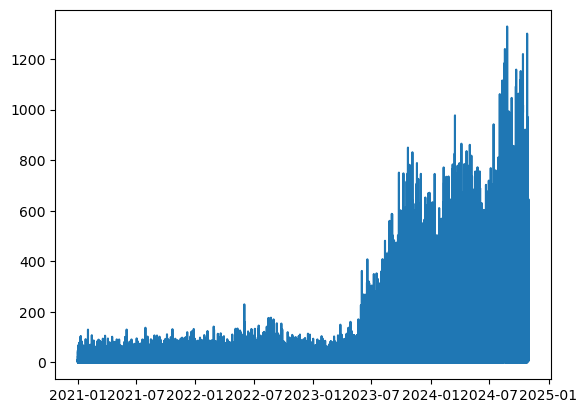

In [14]:
plt.plot(df['time'], df['kWh'])
plt.show()

In [12]:
df = pd.read_csv('data/clean/dataset.csv', parse_dates=['Start', 'End'], low_memory=False)

In [13]:
df.dtypes

idx                      int64
Start           datetime64[ns]
End             datetime64[ns]
kWh                    float64
Revenue                float64
Station                  int64
PortNum                  int64
PortType                object
Adapter                   bool
Client                  object
Tariff                 float64
MaxPower                object
Fishka                  object
Latitude               float64
Longitude              float64
Type                    object
ChargingTime           float64
dtype: object

In [16]:
df

,idx,Start,End,kWh,Revenue,Station,PortNum,PortType,Adapter,Client,Tariff,MaxPower,Fishka,Latitude,Longitude,Type,ChargingTime
0,0,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,209,3,Type 2 Plug,False,553804960,4.50,NaN,True,50.431040,30.390370,FAST,25.80
1,1,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,111,1,CHAdeMO,False,550843379,6.99,NaN,True,50.482070,30.487250,FAST,1.70
2,2,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,147,1,Type 2,False,540085134,4.50,NaN,True,49.247780,23.856100,SLOW,55.02
3,3,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,111,1,CHAdeMO,False,828881697,6.99,NaN,True,50.482070,30.487250,FAST,24.78
4,4,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,209,3,Type 2 Plug,False,553804960,4.50,NaN,True,50.431040,30.390370,FAST,23.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177751,371666,2024-10-31 09:34:21,2024-10-31 10:37:24,73.572,1249.99,561,2,CCS 2/GBT DC,False,857230274,16.99,89.0,NaN,50.672440,26.271480,ULTRAFAST,63.05
177752,371667,2024-10-31 09:36:14,2024-10-31 10:01:05,36.793,625.11,550,1,CCS 2,False,503412773,16.99,119.0,NaN,50.319615,31.033856,ULTRAFAST,24.85
177753,371668,2024-10-31 09:36:48,2024-10-31 09:43:43,1.500,23.98,583,2,CHAdeMO,False,548310042,15.99,23.0,True,46.479330,30.690400,FAST,6.92
177754,371669,2024-10-31 09:37:47,2024-10-31 14:01:29,16.051,208.50,989,1,Type 2/Type 1,False,544211695,12.99,3.0,True,50.533780,30.608210,SLOW,263.70
